<a href="https://colab.research.google.com/github/dssalazarp/SenalesSistemas/blob/master/Parcial_David_Santiago_Salazar_Pineda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **Función de transferencia Original:**

$$
H(s) = \frac{s - b}{s + a}
$$

 **Función de transferencia del sistema en lazo cerrado :**

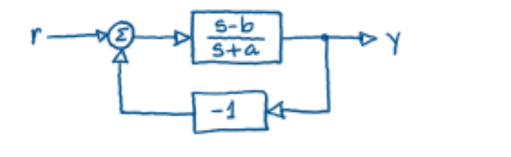




Al cerrar el lazo con G(s) = -1

$$
H(s) = \frac{H(s)}{1 + H(s)G(s)} = \frac{\frac{s-b}{s+a}}{1 + \left(\frac{s-b}{s+a}\right)(-1)}
$$


Simplificando:

$$
H(s) = \frac{s-b}{a+b}
$$

**Polos del sistema:**

$$
\text{Polos: } s = -(a + b)
$$

Condición de estabilidad:

$$
a + b > 0
$$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, impulse, step, bode

# Parámetros de entrada al sistema
a = 4
b = 8

# Función de transferencia en lazo cerrado
numerator = [1, -b]  # Numerador: s - b
denominator = [1, a + b]  # Denominador: s + (a + b)
system = TransferFunction(numerator, denominator)

# Simulación de la respuesta al impulso
time_impulse, response_impulse = impulse(system)

# Simulación de la respuesta al escalón
time_step, response_step = step(system)

# Diagrama de Bode
freq, mag, phase = bode(system)

# Graficar los resultados
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Respuesta al impulso
axs[0].plot(time_impulse, response_impulse, label="Respuesta al impulso")
axs[0].set_title("Respuesta al impulso (a=4, b=8)")
axs[0].set_xlabel("Tiempo (s)")
axs[0].set_ylabel("Amplitud")
axs[0].grid()
axs[0].legend()

# Respuesta al escalón
axs[1].plot(time_step, response_step, label="Respuesta al escalón", color="orange")
axs[1].set_title("Respuesta al escalón (a=4, b=8)")
axs[1].set_xlabel("Tiempo (s)")
axs[1].set_ylabel("Amplitud")
axs[1].grid()
axs[1].legend()

# Diagrama de Bode
axs[2].semilogx(freq, mag, label="Magnitud (dB)")
axs[2].set_title("Diagrama de Bode (Magnitud)")
axs[2].set_xlabel("Frecuencia (rad/s)")
axs[2].set_ylabel("Magnitud (dB)")
axs[2].grid()
axs[2].legend()

plt.tight_layout()
plt.show()






1. Respuesta al impulso: El sistema responde de manera estable, con una rápida disminución de la amplitud, lo que indica que el sistema no oscila y converge rápidamente.

2. Respuesta al escalón: Se observa que la salida crece negativamente hasta estabilizarse en un valor constante, lo que confirma el comportamiento estable.

3. Diagrama de Bode: el sistema muestra una baja ganancia en bajas frecuencias y un incremento gradual amedida que avanza hasta las altas frecuencias,ya que es un de primer orden con polos reales.


# 2. **Función de transferencia del sistema en lazo cerrado con integrador:**

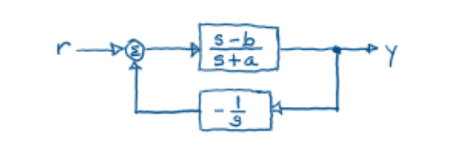

Cuando se introduce un integrador en la realimentación $$G(s) = -\frac{1}{g}$$ ,la función de transferencia en lazo cerrado se convierte en:

$$
H(s) = \frac{\frac{s-b}{s+a}}{1 + \left(\frac{s-b}{s+a}\right)\left(-\frac{1}{g}\right)}
$$

Simplificando:

$$
H(s) = \frac{s - b}{s^2 + as + \frac{b}{g}}
$$

**Polos del sistema:**

Los polos están determinados por las raíces del denominador:

$$
s^2 + as + \frac{b}{g} = 0
$$

**Condición de estabilidad:**

Para que el sistema sea estable, todos los polos deben tener parte real negativa, lo que implica que:
$$
- a > 0
- \frac{b}{g} > 0
$$

In [ ]:
# Parámetros del integrador
g = 1  # Constante del integrador

# Función de transferencia en lazo cerrado con integrador
numerator_integrator = [1, -b]  # Numerador: s - b
denominator_integrator = [1, a, b / g]  # Denominador modificado por el integrador
system_integrator = TransferFunction(numerator_integrator, denominator_integrator)

# Simulación de la respuesta al impulso (con integrador)
time_impulse_integrator, response_impulse_integrator = impulse(system_integrator)

# Simulación de la respuesta al escalón (con integrador)
time_step_integrator, response_step_integrator = step(system_integrator)

# Diagrama de Bode (con integrador)
freq_integrator, mag_integrator, phase_integrator = bode(system_integrator)

# Graficar los resultados
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Respuesta al impulso con integrador
axs[0].plot(time_impulse_integrator, response_impulse_integrator, label="Respuesta al impulso")
axs[0].set_title("Respuesta al impulso (con integrador, a=4, b=8)")
axs[0].set_xlabel("Tiempo (s)")
axs[0].set_ylabel("Amplitud")
axs[0].grid()
axs[0].legend()

# Respuesta al escalón con integrador
axs[1].plot(time_step_integrator, response_step_integrator, label="Respuesta al escalón", color="orange")
axs[1].set_title("Respuesta al escalón (con integrador, a=4, b=8)")
axs[1].set_xlabel("Tiempo (s)")
axs[1].set_ylabel("Amplitud")
axs[1].grid()
axs[1].legend()

# Diagrama de Bode con integrador
axs[2].semilogx(freq_integrator, mag_integrator, label="Magnitud (dB)")
axs[2].set_title("Diagrama de Bode (con integrador)")
axs[2].set_xlabel("Frecuencia (rad/s)")
axs[2].set_ylabel("Magnitud (dB)")
axs[2].grid()
axs[2].legend()

plt.tight_layout()
plt.show()

1. Respuesta al impulso: La respuesta muestra oscilaciones amortiguadas iniciales antes de estabilizarse. Esto es causado por la dinámica introducida por el integrador, que genera un polo adicional en el sistema.

2. Respuesta al escalón: La salida tiene un comportamiento transitorio oscilatorio que eventualmente converge a un valor constante. Esto también refleja el efecto del integrador en el lazo cerrado.

3. Diagrama de Bode: La ganancia del sistema disminuye más rápidamente a altas frecuencias en comparación con el caso sin integrador. Esto es debido al efecto de atenuación característico del integrador.

# Conclucion


1.   El integrador agrega un polo en el origen (𝑠= 0 s=0), lo que afecta la estabilidad y el comportamiento transitorio del sistema. En este caso, el sistema sigue siendo estable, pero con oscilaciones más pronunciadas debido a la interacción entre los polos del integrador y la función de transferencia original.

